# ლექცია #10

## კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტები

ამ ნოუთბუქის გაშვებამდე არ დაგავიწყდეთ საჭირო დამოკიდებულებების (dependencies) დაინსტალირება, რომლებიც მოცემულია `requirements.txt` ფაილში. მარტივად, ტერმინალიდან გაუშვით:

```bash
pip install -r requirements.txt
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

## ხეებზე დაფუძნებული (Tree-Based) ML ალგორითმები (გაგრძელება)

<div style="width:50%; margin: auto;">
<img src="https://cdn.sanity.io/images/oaglaatp/production/7f91e6dc9d5e575b08d7c9ee37deb2264b490db5-5001x3334.jpg?rect=0,1,5001,3333&w=2048&h=1365&auto=format" alt="Groot"/>
</div>

როგორც bagging, **gradient boosting** არის მეთოდოლოგია, რომელიც ML-ის სხვა ალგორითმს შეგვიძლია მოვდოთ ზემოდან. მარტივად და არაფორმალურად რომ ვთქვათ, gradient boosting მოიცავს ორი ტიპის მოდელს:

1. "სუსტი" ML მოდელი, რომელიც, როგორც წესი, decision tree-ა.
2. "ძლიერი" ML მოდელი, რომელიც შედგება მრავალი სუსტი მოდელისგან.

Gradient boosting-ის დროს, ყოველ ნაბიჯზე, ახალი სუსტი მოდელი ტრენინგდება მიმდინარე ძლიერი მოდელის "შეცდომის" პროგნოზირებისთვის (ამას ვუწოდებთ **ფსევდო პასუხს** - **pseudo response**). სუსტი მოდელი (რომელსაც შეგვიძლია ვუწოდოთ "შეცდომა") შემდეგ ემატება ძლიერ მოდელს უარყოფითი ნიშნით, რათა შემცირდეს ძლიერი მოდელის შეცდომა.

Gradient boosting იტერაციულია და თითოეულ იტერაციაზე გამოიყენება ფორმულა:

$$F_{i+1} = F_i - f_i$$

სადაც:

* $F_i$ არის ძლიერი მოდელი $i$ ნაბიჯზე.
* $f_i$ არის სუსტი მოდელი $i$ ნაბიჯზე.

ეს ოპერაცია გრძელდება მანამ, სანამ გაჩერების კრიტერიუმი არ დაკმაყოფილდება, მაგალითად, მაქსიმალური იტერაციების რაოდენობა ან ძლიერი მოდელის "ზედმეტად მორგების" (overfitting) დაწყება.

რეალურად, ამ ფორმულას შესაძლებელია დაემატოს 2 ოპერაცია:

1. shrinkage (შეკუმშვა):

   თითოეულ იტერაციაზე სუსტი მოდელი $f_i$ მრავლდება მცირე მნიშვნელობა $\nu$-ზე (მაგალითად, ხშირად გამოიყენება $\nu = 0.1$) სანამ დაემატება ძლიერ $F_i$ მოდელს. ამ მცირე მნიშვნელობას ეწოდება **shrinkage** (**შეკუმშვა**). შესაბამისად, თითოეული იტერაციის ფორმულა იქნება:

    $$F_{i+1} = F_i - \nu f_i$$
    
    Shrinkage gradient boosting-ში ნეირონულ ქსელებში არსებული learning rate პარამეტრის ანალოგად შეგვიძლია მივიჩნიოთ. ის აკონტროლებს რამდენად სწრაფად სწავლობს ძლიერი მოდელი, რაც ხელს უწყობს "ზედმეტად მორგების" შეზღუდვას. შესაბამისად, shrinkage რომლის მნიშვნელობაც მიახლოებულია 0-თან უფრო მეტად ამცირებს "ზედმეტად მორგებას", ვიდრე 1-თან მიახლოებული shrinkage მნიშვნელობა.

2. ფოთლის მნიშვნელობების ოპტიმიზაცია [ნიუტონის მეთოდის](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) ერთი ნაბიჯით:

   ნიუტონის მეთოდი ისეთივე ოპტიმიზაციის მეთოდია, როგორც gradient descent. თუმცა gradient descent-სგან განსხვავებით, რომელიც იყენებს მხოლოდ ფუნქციის გრადიენტს ოპტიმიზაციისთვის, ნიუტონის მეთოდი იყენებს ფუნქციის გრადიენტსა (პირველი წარმოებული) და მეორე წარმოებულს. მაგალითად, თუ gradient descent-ის ნაბიჯი არის:

   $$x_{i+1} = x_i - \frac {df}{dx}(x_i) = x_i - f'(x_i)$$

   ნიუტონის მეთოდის შემთხვევაში ფორმულა ჩაიწერება შემდეგნაირად:

   $$x_{i+1} = x_i - \frac {\frac {df}{dx} (x_i)} {\frac {d^2f}{d^2x} (x_i)} = x_i - \frac{f'(x_i)}{f''(x_i)}$$


    იმისდა მიხედვით თუ რა გვსურს, ნიუტონის მეთოდი შეიძლება ინტეგრირებული იყოს gradient boosted ხეების მომზადებაში ორი გზით:
    
    * დატრენინგებულ ხეზე ნიუტონის მეთოდი გამოიყენება თითოეულ ფოთოლზე. ხის სტრუქტურა ხელუხლებელია; იცვლება მხოლოდ ფოთლების მნიშვნელობები.
    * ხის ზრდის (ტრენინგის) დროს პირობები შეირჩევა ქულის მიხედვით, რომელიც მოიცავს ნიუტონის ფორმულასაც. შესაბამისად, ეს გავლენას ახდენს ხის სტრუქტურაზე.
  
ძირითადად 3 ტიპის boosting გამოიყენება:

1. **Adaptive Boosting**: Adaptive Boosting (AdaBoost) არის ერთ-ერთი ყველაზე ძველი boosting მოდელი. როგორც სახელი მიანიშნებს, ის ადაპტირდება და ცდილობს თვითგამოსწორებას boosting პროცესის ყოველი გამეორებისას. AdaBoost თავდაპირველად ერთსა და იმავე წონას ანიჭებს თითოეულ მონაცემს. შემდეგ ის ავტომატურად არეგულირებს მონაცემების წონას ყოველი decision tree-ის შემდეგ - ის მეტ წონას ანიჭებს არასწორად კლასიფიცირებულ მონაცემებს, რათა გამოსწორდეს ისინი მომდევნო იტერაციისთვის. ის იმეორებს ამ პროცესს მანამ, სანამ სხვაობა რეალურ და პროგნოზირებულ მნიშვნელობებს შორის არ დავა მისაღები ზღურბლის (threshold) ქვემოთ. სამწუხაროდ, ეს მიდგომა არ მუშაობს კარგად, როდესაც არსებობს კორელაცია მახასიათებლებს შორის ან გვაქვს მაღალი განზომილების მქონე მონაცემები. AdaBoost ხშირად გამოიყენება კლასიფიკაციის პრობლემებისთვის.
2. **Gradient Boosting**: Gradient Boosting (GB) AdaBoost-ის მსგავსი ალგორითმია, რომელიც იყენებს მიმდევრობით დატრენინგების მეთოდს. განსხვავება ის არის, რომ GB არასწორად დაკლასიფიცირებულ მონაცემებს მაღალ წონებს არ ანიჭებს, არამედ დანაკარგის ფუნქციას აოპტიმიზირებს, რომ მიმდინარე ხე უკეთესი და უფრო ეფექტური იყოს ვიდრე წინა. Gradient Boosting შესაძლებელია გამოვიყენოთ კლასიფიკაციისა და რეგრესიის პრობლემებისთვის.
3. **Extreme Gradient Boosting**: Extreme Gradient Boosting (XGBoost) აუმჯობესებს gradient boosting-ის გამოთვლის სიჩქარესა და მასშტაბირებას რამდენიმე გზით. XGBoost იყენებს რამდენიმე CPU core-ს იმისთვის, რომ ტრენინგის პარალელიზაცია მოხდეს. შესაბამისად, როდესაც გვაქვს ბევრი მონაცემები ბევრი მახასიათებლით, XGBoost ერთ-ერთი მთავარი არჩევანი იქნება boosting მეთოდებიდან.


კოდის მაგალითზე განვიხილავთ 2 ალგორითმს:

* Gradient Boosting
* Extreme Gradient Boosting (XGBoost)

### მონაცემების ჩატვირთვა

#### კლასიფიკაცია

კლასიფიკაციისთვის გამოვიყენებთ `scikit-learn`-ში არსებულ ირისის "სათამაშო" მონაცემებს:

In [2]:
iris_data = load_iris()

In [3]:
X_train_iris, X_valid_iris, y_train_iris, y_valid_iris = train_test_split(
    iris_data.data,
    iris_data.target,
    test_size=0.2,
    random_state=1,
    stratify=iris_data.target,
)

In [4]:
print("სატრენინგო მონაცემების ზომა:", X_train_iris.shape, y_train_iris.shape)
print("ვალიდაციის მონაცემების ზომა:", X_valid_iris.shape, y_valid_iris.shape)

სატრენინგო მონაცემების ზომა: (120, 4) (120,)
ვალიდაციის მონაცემების ზომა: (30, 4) (30,)


#### რეგრესია

რეგრესიისთვის გამოვიყენოთ ისევ სარეკლამო დანახარჯების მონაცემები:

In [5]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv",
    index_col="ID",
)
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
X_train_ad, X_valid_ad, y_train_ad, y_valid_ad = train_test_split(
    df.drop(columns=["Sales"]),
    df["Sales"],
    test_size=0.2,
    random_state=1,
)

In [7]:
print("სატრენინგო მონაცემების ზომა:", X_train_ad.shape, y_train_ad.shape)
print("ვალიდაციის მონაცემების ზომა:", X_valid_ad.shape, y_valid_ad.shape)

სატრენინგო მონაცემების ზომა: (160, 3) (160,)
ვალიდაციის მონაცემების ზომა: (40, 3) (40,)


### Gradient Boosting

`scikit-learn`-ს აქვს GB-ების იმპლემენტაცია კლასიფიკაციისთვისაც ([GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)) და რეგრესიისთვისაც ([GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)).

#### კლასიფიკაცია

კლასიფიკაციის დროს, დანაკარგის ფუნქციად, ნაგულისხმევად, გამოიყენება log loss, ანუ თითოეული კლასისთვის ცალკეული რეგრესიის გადაწყვეტილების ხე იქმნება ნაგულისხმევად log loss-ით. მაგალითად, თუ ირისის 3 სახეობა გვაქვს, შესაბამისად თითოეული დატრენინგებული ესტიმატორი იქნება 3 ხე. გამონაკლისია ბინარული კლასიფიკაცია, როდესაც მხოლოდ 1 ხის აგება ხდება. თუმცა გახლეჩვა/გაყოფის კრიტერიუმად გამოიყენება [ფრიდმენის MSE](https://github.com/scikit-learn/scikit-learn/blob/a63b021310ba13ea39ad3555f550d8aeec3002c5/sklearn/tree/_criterion.pyx#L1522).

In [8]:
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train_iris, y_train_iris)

GradientBoostingClassifier(random_state=1)

როგორც ზემოთ ვახსენეთ, სამივე კლასისთვის შეიქმნა ცალ-ცალკე გადაწყვეტილების ხე:

In [9]:
gb_clf.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7F29378FD640),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7F29378FD640),
       DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7F29378FD640)],
      dtype=object)

რა თქმა უნდა, შეგვიძლია ამ გადაწყვეტილების ხეების ვიზუალიზაცია. მაგალითად, პირველი ესტიმატორისთვის გამოვსახოთ თითოეული კლასისთვის შექმნილი ხე:

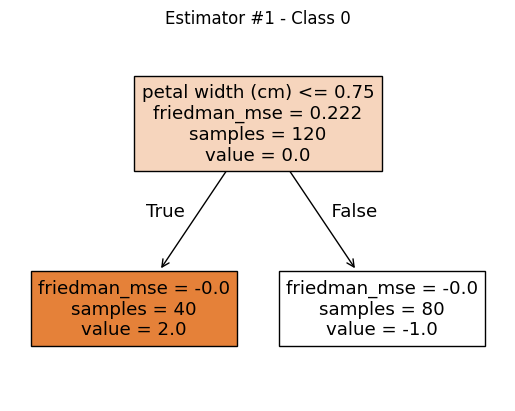

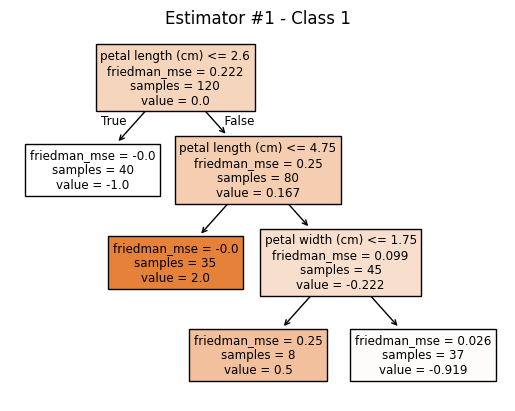

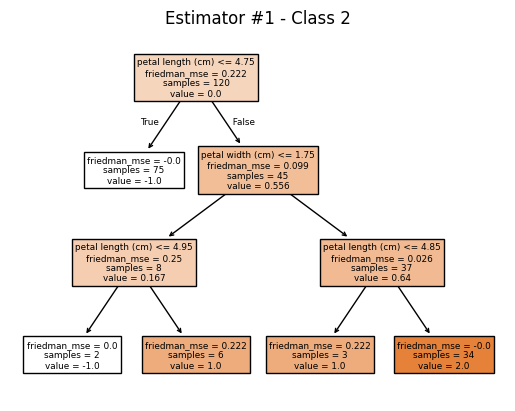

In [10]:
for cls, estimator in enumerate(gb_clf.estimators_[0]):
    plot_tree(
        estimator,
        feature_names=iris_data.feature_names,
        class_names=iris_data.target_names,
        filled=True,
    )
    plt.title(f"Estimator #1 - Class {cls}")
    plt.show()

ასევე შეგვიძლია ვნახოთ მახასიათებლების importance:

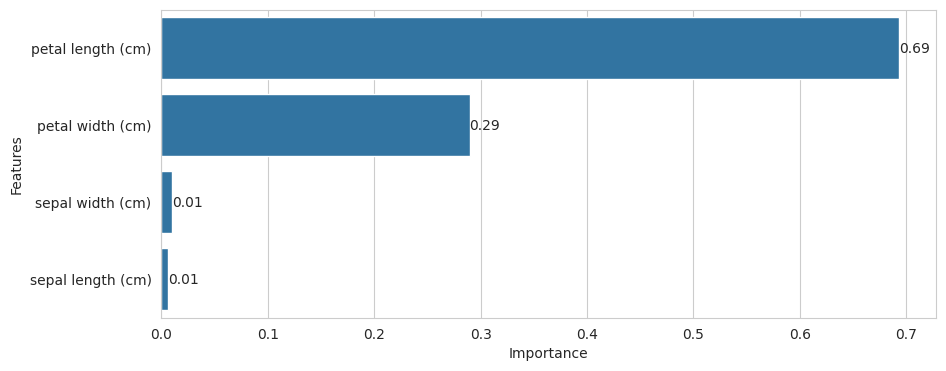

In [11]:
gb_clf_feat_importances = pd.Series(
    gb_clf.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=gb_clf_feat_importances,
        y=gb_clf_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [12]:
train_preds_gb_clf = gb_clf.predict(X_train_iris)
valid_preds_gb_clf = gb_clf.predict(X_valid_iris)

print(
    "აკურატულობა სატრენინგო მონაცემებზე: "
    f"{accuracy_score(y_train_iris, train_preds_gb_clf) * 100:.2f}%"
)
print(
    "აკურატულობა ვალიდაციის მონაცემებზე: "
    f"{accuracy_score(y_valid_iris, valid_preds_gb_clf) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 100.00%
აკურატულობა ვალიდაციის მონაცემებზე: 96.67%


#### რეგრესია

რეგრესიის შემთხვევაში ესტიმატორი შედგება ერთი ხისგან და ნაგულისხმევად იყენებს კვადრატული დანაკარგის ფუნქციას, თუმცა გაყოფის/გახლეჩვის კრიტერიუმად იყენებს ფრიდმენის MSE-ს.

In [13]:
gb_reg = GradientBoostingRegressor(random_state=1)
gb_reg.fit(X_train_ad, y_train_ad)

GradientBoostingRegressor(random_state=1)

In [14]:
gb_reg.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                             random_state=RandomState(MT19937) at 0x7F291B6EB440)],
      dtype=object)

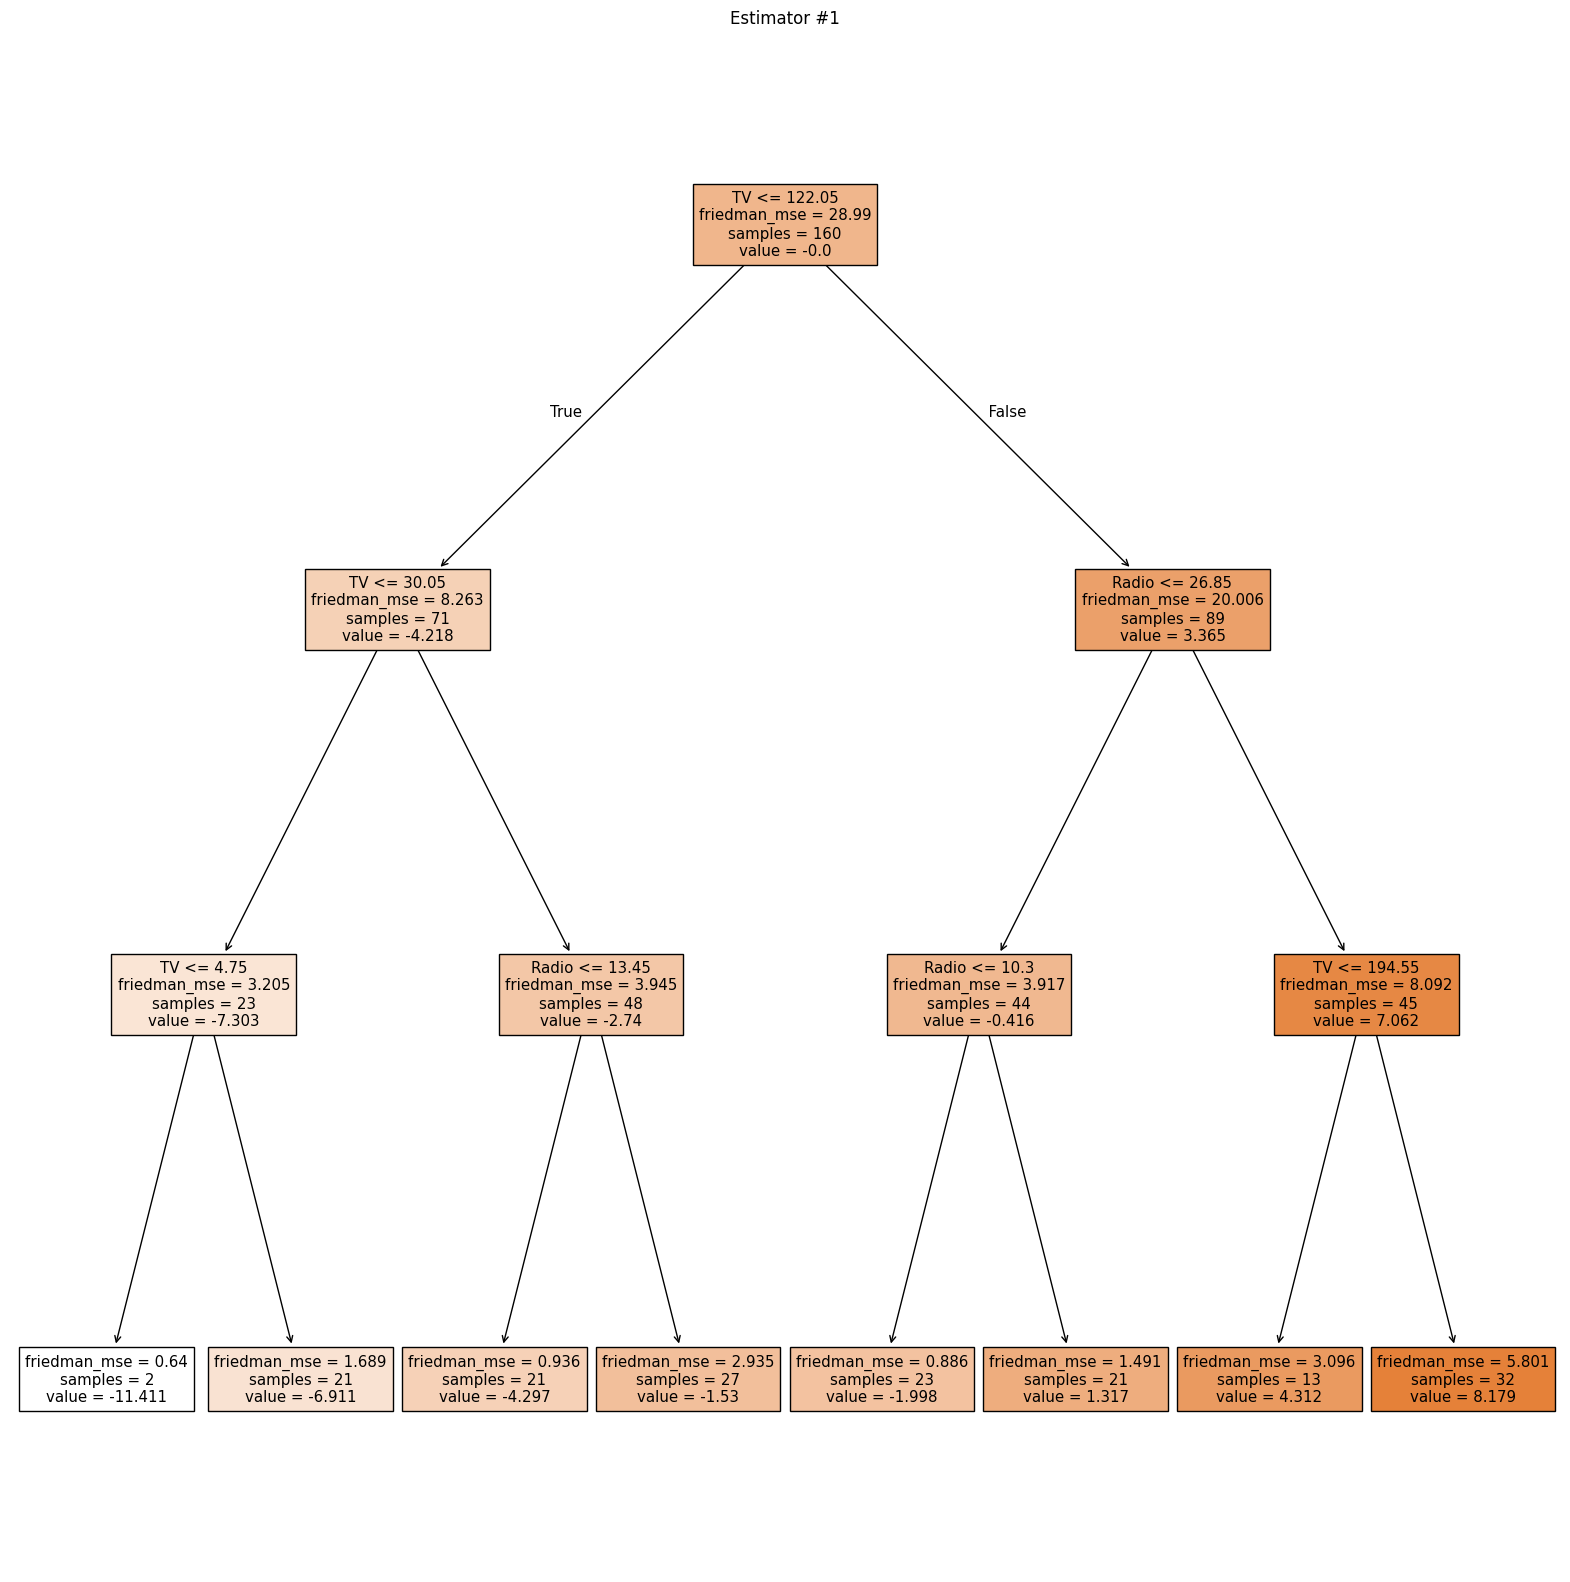

In [15]:
plt.figure(figsize=(20, 20))
plot_tree(
    gb_reg.estimators_[0][0], feature_names=["TV", "Radio", "Newspaper"], filled=True
)
plt.title(f"Estimator #1")
plt.show()

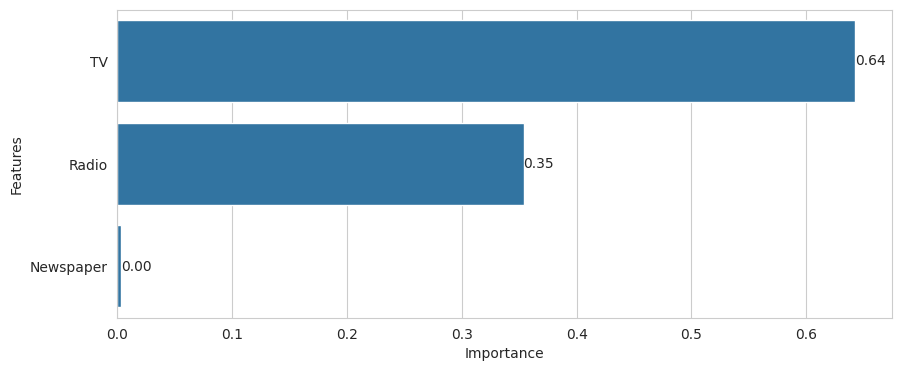

In [16]:
gb_reg_feat_importances = pd.Series(
    gb_reg.feature_importances_, index=["TV", "Radio", "Newspaper"]
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=gb_reg_feat_importances,
        y=gb_reg_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [17]:
train_preds_gb_reg = gb_reg.predict(X_train_ad)
valid_preds_gb_reg = gb_reg.predict(X_valid_ad)

print("R^2 სატრენინგო მონაცემებზე: " f"{r2_score(y_train_ad, train_preds_gb_reg):.3f}")
print("R2 ვალიდაციის მონაცემებზე: " f"{r2_score(y_valid_ad, valid_preds_gb_reg):.3f}")

R^2 სატრენინგო მონაცემებზე: 0.999
R2 ვალიდაციის მონაცემებზე: 0.975


In [18]:
print(
    "MSE სატრენინგო მონაცემებზე: "
    f"{mean_squared_error(y_train_ad, train_preds_gb_reg):.3f}"
)
print(
    "MSE ვალიდაციის მონაცემებზე: "
    f"{mean_squared_error(y_valid_ad, valid_preds_gb_reg):.3f}"
)

MSE სატრენინგო მონაცემებზე: 0.035
MSE ვალიდაციის მონაცემებზე: 0.461


### Extreme Gradient Boosting (XGBoost)

[XGBoost](https://xgboost.readthedocs.io/en/stable/index.html) ერთ-ერთი საკმაოდ გავრცელებული ბიბლიოთეკაა, რომელიც რეალურად gradient boosted გადაწყვეტილების ხეებს იყენებს, თუმცა გამოირჩევა სისწრაფითა და მასშტაბირებით.

`objective` პარამეტრში ვუთითებთ სწავლების ტიპს და მის შესაბამის დანაკარგის ფუნქციას, რომელსაც მოდელი გამოიყენებს ოპტიმიზაციისთვის ტრენინგის დროს. რადგანაც გვაქვს 3 კლასი, შესაბამისად, მულტიკლასიფიკაცია გვჭირდება. როდესაც 2-ზე მეტი კლასი გვაქვს ვიყენებთ softmax ფუნქციას. ის გარდაქმნის raw პროგნოზირების ქულების ვექტორს (logits) ალბათობის განაწილებად მრავალი კლასისთვის, შესაბამისად, მიღებული ყველა კლასის ალბათობების ჯამი 1-ის ტოლია.

In [19]:
xgb_clf = xgb.XGBClassifier(objective="multi:softprob", random_state=1)
xgb_clf.fit(X_train_iris, y_train_iris)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

მახასიათებლების importance ნახვა აქაც მარტივად შეიძლება:

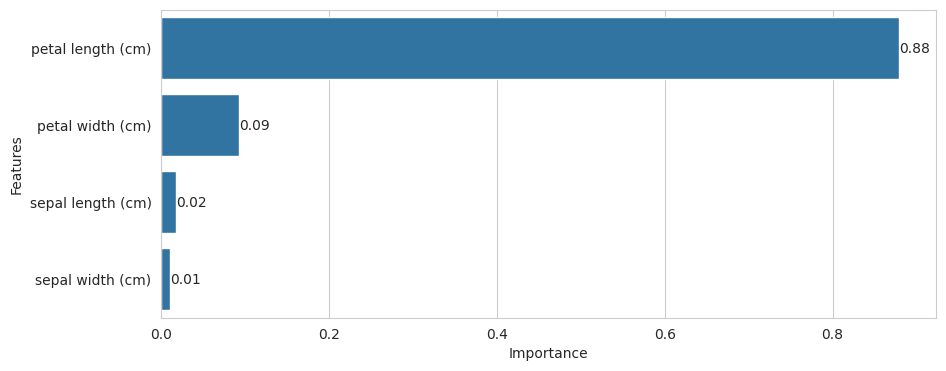

In [20]:
xgb_clf_feat_importances = pd.Series(
    xgb_clf.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=xgb_clf_feat_importances,
        y=xgb_clf_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [21]:
train_preds_xgb_clf = xgb_clf.predict(X_train_iris)
valid_preds_xgb_clf = xgb_clf.predict(X_valid_iris)

print(
    "აკურატულობა სატრენინგო მონაცემებზე: "
    f"{accuracy_score(y_train_iris, train_preds_xgb_clf) * 100:.2f}%"
)
print(
    "აკურატულობა ვალიდაციის მონაცემებზე: "
    f"{accuracy_score(y_valid_iris, valid_preds_xgb_clf) * 100:.2f}%"
)

აკურატულობა სატრენინგო მონაცემებზე: 100.00%
აკურატულობა ვალიდაციის მონაცემებზე: 93.33%


#### რეგრესია

რეგრესიის შემთხვევაში ნაგულისხმევად გამოიყენება "reg:squarederror", რაც ავტომატურად გულისხმობს, რომ რეგრესიის ამოცანაა და კვადრატული დანაკარგის ფუნქცია.

In [22]:
xgb_reg = xgb.XGBRegressor(random_state=1)
xgb_reg.fit(X_train_ad, y_train_ad)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

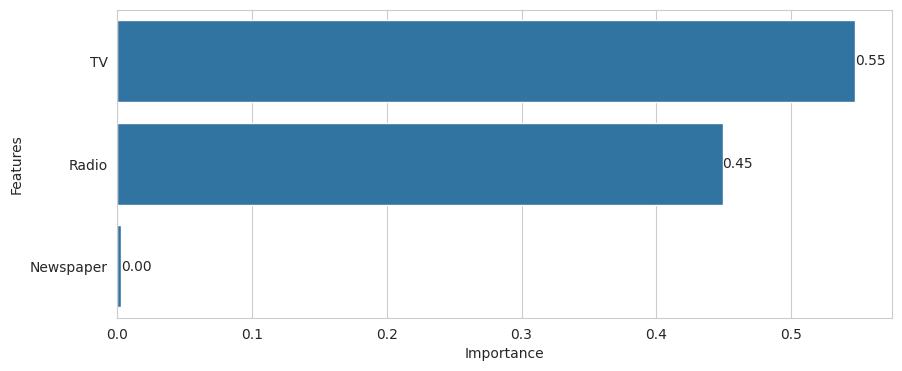

In [23]:
xgb_reg_feat_importances = pd.Series(
    xgb_reg.feature_importances_, index=["TV", "Radio", "Newspaper"]
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=xgb_reg_feat_importances,
        y=xgb_reg_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [24]:
train_preds_xgb_reg = xgb_reg.predict(X_train_ad)
valid_preds_xgb_reg = xgb_reg.predict(X_valid_ad)

print("R^2 სატრენინგო მონაცემებზე: " f"{r2_score(y_train_ad, train_preds_xgb_reg):.3f}")
print("R2 ვალიდაციის მონაცემებზე: " f"{r2_score(y_valid_ad, valid_preds_xgb_reg):.3f}")

R^2 სატრენინგო მონაცემებზე: 1.000
R2 ვალიდაციის მონაცემებზე: 0.976


In [25]:
print(
    "MSE სატრენინგო მონაცემებზე: "
    f"{mean_squared_error(y_train_ad, train_preds_xgb_reg):.3f}"
)
print(
    "MSE ვალიდაციის მონაცემებზე: "
    f"{mean_squared_error(y_valid_ad, valid_preds_xgb_reg):.3f}"
)

MSE სატრენინგო მონაცემებზე: 0.000
MSE ვალიდაციის მონაცემებზე: 0.454


### დამატებითი მასალა

* [Greedy Function Approximation: A Gradient Boosting Machine](https://www.researchgate.net/publication/2424824_Greedy_Function_Approximation_A_Gradient_Boosting_Machine)
* [სტატია gradient boosting-ზე - რეგრესია](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)
* [სტატია gradient boosting-ზე - კლასიფიკაცია](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)
* [Trevor Hastie-ის ლექციის ვიდეო Gradient Boosting](https://youtu.be/wPqtzj5VZus)
* [Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/stable/)